# HLMA 408: Échantillonage aléatoire

***
> __Auteur__: Joseph Salmon
> <joseph.salmon@umontpellier.fr>

<a id="intro"> </a>

## Introduction et présentation

### Import des packages usuels

In [1]:
import platform
import sys
from download import download
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact  # widget manipulation
from scipy.special import comb, binom
from scipy.stats import norm

### Commande "magique" pour un affichage plus avancé en Jupyter

In [2]:
%matplotlib inline

### Préparation pour l'affichage graphique et sauvegarder les images

In [3]:
# saving tools for the course:
sns.set_context("paper", font_scale=1)
sns.set_style("ticks")
sns.set_palette("colorblind")

# colors 
brown = (0.64, 0.16, 0.16)
purple = (148. / 255, 0, 211. / 255)


dirname = "../prebuiltimages/"
imageformat = ".pdf"

### Grossesses et cigarettes, impact sur la santé du nouveau né

Description des données:

"This  dataset  is  found  from
http://www.stat.berkeley.edu/users/statlabs/labs.html. 
It accompanies the excellent text Stat Labs:  Mathematical Statistics through Applications
Springer-Verlag (2001) by Deborah Nolan and Terry Speed."

Plus de détails:
https://www.stat.berkeley.edu/users/statlabs/papers/sample.pdf
(notamment sur les biais de collectes des données...)

### Téléchargement et import pour sauvegarder les données

In [4]:
# to use the default values of utils for instance
saving = True
path_target = "./utils.py"
url_shared_files = "http://josephsalmon.eu/enseignement/Montpellier/HLMA408/sharedcode/utils.py"
download(url_shared_files, path_target, replace=False)
from utils import my_saving_display

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


### Téléchargement et import des données

In [5]:
url = "http://josephsalmon.eu/enseignement/datasets/babies23.data"
# url = "http://www.stat.berkeley.edu/users/statlabs/data/babies23.data" # backup url, without header.
path_target = "./babies23.data"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./babies23.data'

### Option de *pandas* et de pré-traitement

In [6]:
# Preoprocessing: only run once or big trouble (think about it!)
is_preprocessing_done = 0  # init at 0,if greater don't redo it
pd.options.display.max_rows = 8  # set not to display to many lines in pandas
pd.set_option('precision', 0)  # set to display number at precision 0 in pandas

## Lecture de la base de données et constructions d'un dataframe

In [7]:
df_babies = pd.read_csv("babies23.data", skiprows=38, sep='\s+') # \s+ : for hanlding spaces
df_babies.head(n=10)  # df stands for Data Frame

,id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
0,15,5,1,1411,284,1,120,1,8,27,...,8,31,5,65,110,1,1,0,0,0
1,20,5,1,1499,282,1,113,2,0,33,...,0,38,5,70,148,1,4,0,0,0
2,58,5,1,1576,279,1,128,1,0,28,...,5,32,1,99,999,1,2,1,1,1
3,61,5,1,1504,999,1,123,2,0,36,...,3,43,4,68,197,1,8,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,102,5,1,1449,244,1,138,4,7,33,...,7,37,4,99,999,1,98,0,0,0
7,129,5,1,1562,245,1,132,2,7,23,...,7,23,4,71,192,1,2,0,0,0
8,142,5,1,1408,289,1,120,3,0,25,...,3,26,1,70,180,0,2,0,0,0
9,148,5,1,1568,299,1,143,3,0,30,...,0,34,5,99,999,1,2,1,1,4


### Pré-traitement:
Lire l'entête du fichier pour comprendre tout ça... les unités, les données manquantes etc.

In [8]:
if is_preprocessing_done<1:
    print("You have to do the pre-processing only once, to avoid unit issues")
    # Remark: use inplace option to avoid useless copies for nans
    df_babies['smoke'].replace(9, np.nan, inplace=True)  # handle missing values
    df_babies['smoke'].replace(0, False, inplace=True)
    df_babies['smoke'].replace(1, True, inplace=True)
    df_babies['smoke'].replace(2, True, inplace=True)
    df_babies['smoke'].replace(3, True, inplace=True)

    df_babies.dropna(inplace=True)
    print("This is done only because {} < 1".format(is_preprocessing_done))
    is_preprocessing_done +=1

You have to do the pre-processing only once, to avoid unit issues
This is done only because 0 < 1


### Analyse du sexe de l'enfant

In [9]:
df_babies.head(20)

,id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
0,15,5,1,1411,284,1,120,1,8,27,...,8,31,5,65,110,1,1,False,0,0
1,20,5,1,1499,282,1,113,2,0,33,...,0,38,5,70,148,1,4,False,0,0
2,58,5,1,1576,279,1,128,1,0,28,...,5,32,1,99,999,1,2,True,1,1
3,61,5,1,1504,999,1,123,2,0,36,...,3,43,4,68,197,1,8,True,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,207,5,1,1481,255,1,92,3,4,25,...,7,28,1,99,999,1,1,True,1,5
17,217,5,1,1605,261,1,115,3,3,33,...,3,33,2,70,140,1,4,True,1,5
18,239,5,1,1431,261,1,144,2,0,33,...,5,35,4,99,999,1,7,False,0,0
19,240,5,1,1647,288,1,119,3,0,43,...,0,45,2,73,195,1,5,True,1,6


Text(0.5, 1.0, 'Densité du poids du bébé selon le statut tabagique')

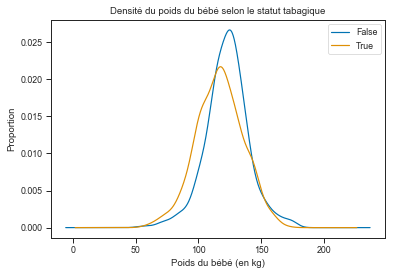

In [10]:
plt.figure(figsize=(6,4))
df_babies.groupby("smoke").wt.plot(kind='kde')
plt.legend()
plt.xlabel('Poids du bébé (en kg)')
plt.ylabel('Proportion')
plt.title("Densité du poids du bébé selon le statut tabagique")

In [11]:
smoke_by_type = df_babies.smoke.value_counts()
n_total = df_babies.smoke.count()
print("Il y a {} bébés dont on connait le statut tabagique de la mère".format(n_total))

Il y a 1226 bébés dont on connait le statut tabagique de la mère


In [12]:
smoke_by_type

True     682
False    544
Name: smoke, dtype: int64

In [13]:
smoke_ratio= smoke_by_type[True] / df_babies.smoke.count()

In [14]:
print("La proportion de mères fumeuses est de {0:.2f} % dans la popultation totale.".format(smoke_ratio * 100))

La proportion de mères fumeuses est de 55.63 % dans la popultation totale.


## Tirage aléatoire d'un $n$-échantillons

In [15]:
np.random.seed(44)  # graine aléatoire

In [16]:
n_samples = 91  # n = n_sample

# change the random_state value to get another random sample
# df_extract = df_babies.sample(n=n_samples, random_state=45)
df_extract = df_babies.sample(n=n_samples)
smoke_by_type_extract = df_extract.smoke.value_counts()
smoke_ratio_extract = smoke_by_type_extract[True] / df_extract.smoke.count()
smoke_ratio_all = df_babies[df_babies['smoke'] == True]['smoke'].sum() / df_babies.smoke.count()

# smoke_by_type_extract

In [17]:
print("Le nombre de mères fumeuses est de {0} sur n={1} individus dans la popultation extraite.".format(smoke_by_type_extract[True].sum(), df_extract.smoke.count()))
print("Le nombre de mères fumeuses est de {0} sur N={1} individus dans la popultation totale.".format(df_babies[df_babies['smoke']==True]['smoke'].sum(), df_babies.smoke.count()))

print("La proportion de mères fumeuses est de {0:.2f} % dans la popultation extraite.".format(smoke_ratio_extract * 100))
print("La proportion de mères fumeuses est de {0:.2f} % dans la popultation total.".format(smoke_ratio_all * 100))

Le nombre de mères fumeuses est de 52 sur n=91 individus dans la popultation extraite.
Le nombre de mères fumeuses est de 682 sur N=1226 individus dans la popultation totale.
La proportion de mères fumeuses est de 57.14 % dans la popultation extraite.
La proportion de mères fumeuses est de 55.63 % dans la popultation total.


In [18]:
comb(n_total, n_samples, exact=True)

27163361289825550523268206145916032768087536721887922928079532500193847739178087753157271974542740511341704937942015497847278125901041363840

In [19]:
n_digits = sys.getsizeof(comb(n_total, n_samples, exact=True))

In [20]:
print(r"Il y a environ 10^{2} façon de choisir {0} nombres parmi {1}".format(n_samples, n_total, n_digits))

Il y a environ 10^88 façon de choisir 91 nombres parmi 1226


## Intervalle de confiance avec le TCL


In [21]:
n_samples = 1000
X = np.random.random(n_samples)
meanX = np.mean(X)
sdX = np.std(X)

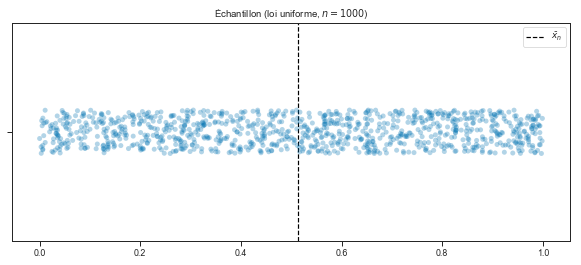

In [22]:
fig = plt.figure(figsize=(10,4))
ax = sns.stripplot(x=X,alpha=0.3,jitter = 0.1, size=10, marker=".")
plt.title(r"Échantillon (loi uniforme, $n ={0}$)".format(n_samples)) 
plt.axvline(meanX, linestyle='--', color='k', label="$\\bar{x}_n$")
plt.legend()
plt.show()

In [23]:
Z = (X - meanX) / sdX

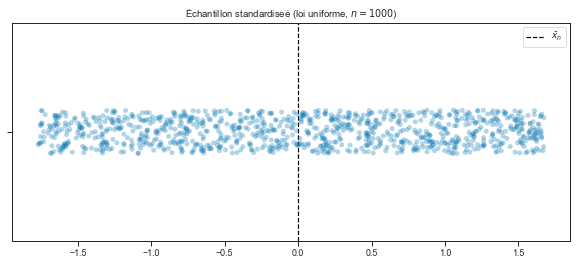

In [24]:
fig = plt.figure(figsize=(10,4))
ax = sns.stripplot(x=Z,alpha=0.3,jitter = 0.1, size=10, marker=".")
plt.title(r"Échantillon standardiseé (loi uniforme, $n ={0}$)".format(n_samples)) 
plt.axvline(0, linestyle='--', color='k', label="$\\bar{x}_n$")
plt.legend()
plt.show()

In [25]:
alpha = 0.00001
c =  norm.ppf(1- alpha/ 2)
IC = np.array([meanX - c * sdX / np.sqrt(n_samples), meanX + c * sdX / np.sqrt(n_samples)])

In [26]:
IC, meanX, c

(array([0.47304602, 0.55406755]), 0.5135567825131291, 4.417173413467605)

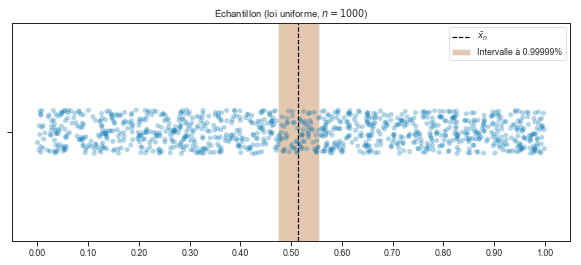

In [27]:
from matplotlib.ticker import StrMethodFormatter
fig = plt.figure(figsize=(10, 4))
p = plt.axvspan(IC[0], IC[1], facecolor=sns.color_palette()[
                5], alpha=0.5, label="Intervalle à {}%".format(1-alpha))
ax = sns.stripplot(x=X, alpha=0.3, jitter=0.1, size=10, marker=".")
plt.title(r"Échantillon (loi uniforme, $n ={0}$)".format(n_samples))
plt.axvline(meanX, linestyle='--', color='k', label="$\\bar{x}_n$")
bottom, top = plt.ylim()
xtixcks_val = np.arange(0, 1.1, 0.1)
plt.xticks(xtixcks_val, xtixcks_val)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.legend()
plt.show()
my_saving_display(fig, dirname,
                  "jitter_IC_TCL", imageformat, saving=saving)

In [28]:
def IC_by_TCL(alpha=0.05, n_samples=1000):

    X = np.random.random(n_samples)
    meanX = np.mean(X)
    sdX = np.std(X)
    Z = (X - meanX) / sdX
    c = norm.ppf(1 - alpha / 2)
    IC = np.array([meanX - c * sdX / np.sqrt(n_samples),
                   meanX + c * sdX / np.sqrt(n_samples)])
    fig = plt.figure(figsize=(10, 4))
    p = plt.axvspan(IC[0], IC[1], facecolor=sns.color_palette()[
                    5], alpha=0.5, label="Intervalle à {}%".format(1 - alpha))
    ax = sns.stripplot(x=X, alpha=0.3, jitter=0.1, size=10, marker=".")
    plt.title(r"Échantillon (loi uniforme, $n ={0}$)".format(n_samples))
    plt.axvline(meanX, linestyle='--', color='k', label="$\\bar{x}_n$")
    bottom, top = plt.ylim()
    xtixcks_val = np.arange(0, 1.1, 0.1)
    plt.xticks(xtixcks_val, xtixcks_val)
    plt.gca().xaxis.set_major_formatter(
        StrMethodFormatter('{x:,.2f}'))  # 2 decimal places
    plt.legend()
    plt.show()

### Visualiseur de l'impact de $\alpha$ et de $n$ sur les IC du TCL 

In [29]:
interact(IC_by_TCL, alpha=(0.001, .999, 0.001),n_samples=(100,2000,100))  # change the first and second value to check more quantiles 

interactive(children=(FloatSlider(value=0.05, description='alpha', max=0.999, min=0.001, step=0.001), IntSlide…

<function __main__.IC_by_TCL(alpha=0.05, n_samples=1000)>

In [30]:
# np.shape(np.where(np.logical_and(X>=IC[0], X<=IC[1])))[1]

###  Répétition  de l'expérience
On tire 500 échantillons de taille 1000


In [31]:
is_IC_has_param = 0 # before starting no IC contains the true parameter 
n_repetition = 500
for i in range(n_repetition):
    n_samples = 1000
    X = np.random.random(n_samples)
    meanX = np.mean(X)
    sdX = np.std(X)
    Z = (X - meanX) / sdX
    alpha = 0.04
    c =  norm.ppf(1- alpha/ 2)
    IC = np.array([meanX - c * sdX / np.sqrt(n_samples), meanX + c * sdX / np.sqrt(n_samples)])
    if (IC[0]<0.5) and (IC[1]>0.5):
        is_IC_has_param += 1
#     else:
#         print(IC)
"Proportion de fois que l'échantillon contient le vrai paramètre (=espérance): {}".format(is_IC_has_param/n_repetition)

"Proportion de fois que l'échantillon contient le vrai paramètre (=espérance): 0.97"

#<font color='red'> EXERCICE : sondage vs. referendum. </font>
Créer un tableau avec une colonne de 1 ou de 0 générées par un loi binomiale de paramètre 0.4, pour N = 30000000. Échantilloner n=1000 indivius uniformément de cette population et comparer les proportions de 1 obtenus dans la population totale et dans la population échantillonées.
Recommencer et commenter.

Aide: voir https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.binomial.html